***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
from sklearn.datasets import load_breast_cancer

In [91]:
cancer = load_breast_cancer()

In [92]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [93]:
print(cancer['DESCR'])

r wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 i

In [94]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [95]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [96]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [97]:
#Train test split

X = df_feat
y = df_target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [98]:
#Train the support vector classifier

from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training score: 0.989010989010989
Testing score: 0.9824561403508771
[[41  2]
 [ 0 71]]


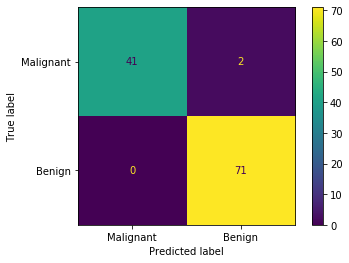

In [99]:
#Predictions and evaluations

y_pred = svc.predict(X_test)
print(f'Training score: {svc.score(X_train, y_train)}')
print(f'Testing score: {svc.score(X_test, y_test)}')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])
disp.plot()

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [100]:
#Set parameters

param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': list(range(1, 10)),
        'max_iter': [-1],
        'gamma': ['scale', 'auto']}

In [101]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.)

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(svc, param)
grid.fit(X_train, y_train)

print(f"Best SVC Parameters: {grid.best_params_}")
print(f"Best score is {grid.best_score_}")

Best SVC Parameters: {'degree': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1}
Best score is 0.9758241758241759


In [102]:
#Call the best parameters

svc_best = SVC(degree=1, gamma='scale', kernel='poly')
svc_best.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
#print best score

y_pred_best = svc_best.predict(X_test)
print(f'Training score: {svc_best.score(X_train, y_train)}')
print(f'Testing score: {svc_best.score(X_test, y_test)}')

Training score: 0.9824175824175824
Testing score: 0.9736842105263158


[[40  3]
 [ 0 71]]


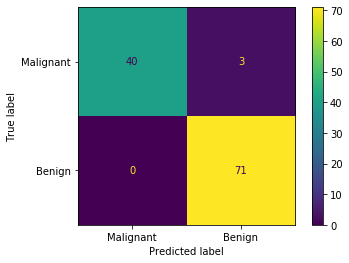

In [104]:
# print the confusion matrix

cm = confusion_matrix(y_test, y_pred_best)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])
disp.plot()

# Discussion of results